In [1]:
import time, os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.major.pad': '7.0'})
plt.rcParams.update({'xtick.major.size': '7.5'})
plt.rcParams.update({'xtick.major.width': '1.5'})
plt.rcParams.update({'xtick.minor.pad': '7.0'})
plt.rcParams.update({'xtick.minor.size': '3.5'})
plt.rcParams.update({'xtick.minor.width': '1.0'})
plt.rcParams.update({'ytick.major.pad': '7.0'})
plt.rcParams.update({'ytick.major.size': '7.5'})
plt.rcParams.update({'ytick.major.width': '1.5'})
plt.rcParams.update({'ytick.minor.pad': '7.0'})
plt.rcParams.update({'ytick.minor.size': '3.5'})
plt.rcParams.update({'ytick.minor.width': '1.0'})
plt.rcParams.update({'xtick.color': 'k'})
plt.rcParams.update({'ytick.color': 'k'})
plt.rcParams.update({'font.size': 30})
plt.rcParams.update({'axes.linewidth':2})
plt.rcParams.update({'patch.linewidth':2})
plt.rcParams['figure.figsize'] = (10, 5)
%matplotlib inline
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=20, usetex=True)
import re

import gc
import decimal

from astropy.cosmology import WMAP9 as cosmo

from multiprocessing import Pool
from contextlib import closing
import pickle

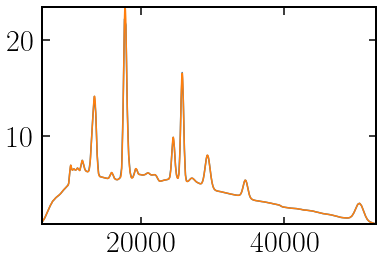

In [66]:
from astropy.io.fits import getdata
data, hdr = getdata('/Users/gkhullar/Downloads/wb63908_c55_2020-11-24_07.59.08/lineplot/lineplot_sn.fits', header=True)
from scipy.interpolate import UnivariateSpline
spline_final = UnivariateSpline(data.WAVELENGTH*1e4,data.sn,s=0)
wx = np.linspace(data.WAVELENGTH[0]*1e4,data.WAVELENGTH[-1]*1e4,100)
plt.plot(data.WAVELENGTH*1e4, data.sn)
#len(data.sn)
plt.plot(wx,spline_final(wx))

In [27]:
### MULTIPLY SNR BY root(2.7)!!!!!!!!!!!!!!!!

"""multip = np.sqrt(2.7)

from astropy.io.fits import getdata
data, hdr = getdata('../data/sfh/smallclump_bin5_burst/lineplot_sn_235m.fits', header=True)
from scipy.interpolate import UnivariateSpline
spline_final = UnivariateSpline(data.WAVELENGTH*1e4,data.sn * multip,s=0)
wx = np.linspace(data.WAVELENGTH[0]*1e4,data.WAVELENGTH[-1]*1e4,1000)

data, hdr = getdata('../data/sfh/smallclump_bin5_burst/lineplot_sn_395m.fits', header=True)
from scipy.interpolate import UnivariateSpline
spline_final2 = UnivariateSpline(data.WAVELENGTH*1e4,data.sn * multip,s=0)
wx2 = np.linspace(data.WAVELENGTH[0]*1e4,data.WAVELENGTH[-1]*1e4,1000)

wx3 = wx[wx<wx2[0]]

plt.figure(figsize=(10,6))
plt.plot(wx,spline_final(wx))
plt.plot(wx2,spline_final2(wx2))
plt.xscale('log')
plt.yscale('log')
plt.plot(wx3,spline_final(wx3))"""

"multip = np.sqrt(2.7)\n\nfrom astropy.io.fits import getdata\ndata, hdr = getdata('../data/sfh/smallclump_bin5_burst/lineplot_sn_235m.fits', header=True)\nfrom scipy.interpolate import UnivariateSpline\nspline_final = UnivariateSpline(data.WAVELENGTH*1e4,data.sn * multip,s=0)\nwx = np.linspace(data.WAVELENGTH[0]*1e4,data.WAVELENGTH[-1]*1e4,1000)\n\ndata, hdr = getdata('../data/sfh/smallclump_bin5_burst/lineplot_sn_395m.fits', header=True)\nfrom scipy.interpolate import UnivariateSpline\nspline_final2 = UnivariateSpline(data.WAVELENGTH*1e4,data.sn * multip,s=0)\nwx2 = np.linspace(data.WAVELENGTH[0]*1e4,data.WAVELENGTH[-1]*1e4,1000)\n\nwx3 = wx[wx<wx2[0]]\n\nplt.figure(figsize=(10,6))\nplt.plot(wx,spline_final(wx))\nplt.plot(wx2,spline_final2(wx2))\nplt.xscale('log')\nplt.yscale('log')\nplt.plot(wx3,spline_final(wx3))"

In [28]:
"""spline_final4 = UnivariateSpline(np.concatenate((wx3,wx2)),np.concatenate((spline_final(wx3),spline_final2(wx2))),s=0)
wx4 = np.concatenate((wx3,wx2))

plt.figure(figsize=(10,6))
plt.loglog(wx4,spline_final4(wx4),lw=3)
plt.show()"""

'spline_final4 = UnivariateSpline(np.concatenate((wx3,wx2)),np.concatenate((spline_final(wx3),spline_final2(wx2))),s=0)\nwx4 = np.concatenate((wx3,wx2))\n\nplt.figure(figsize=(10,6))\nplt.loglog(wx4,spline_final4(wx4),lw=3)\nplt.show()'

In [29]:
spec_old = np.genfromtxt('../data/model_spectrum_z2.8_age_0.01_met_-0.5_dust2_0.25_NONPARA2.txt')

w0 = spec_old[0]
f0 = spec_old[1]

w_low = 0.57e4
#w_hi = 35.1e4
w_hi = 5.32e4
cond_prelim = (w0>w_low)&(w0<w_hi)
w1 = w0[cond_prelim]
f1 = f0[cond_prelim]
e1 = 0.1*f0[cond_prelim]

wstep=100
w2 = np.arange(w_low,w_hi,wstep) 
    

## Prospector smoothing the template spectra from FSPS


In [ ]:
from prospect.utils.smoothing import smoothspec
f2 = smoothspec(w1,f1,smoothtype="R",resolution=100,fftsmooth=False,outwave=w2)
#f2 = smoothspec(w1,f1,smoothtype="R",resolution=1000,fftsmooth=False,outwave=w2)
#f2 = smoothspec(w1,f1,smoothtype="R",resolution=1000,fftsmooth=False,outwave=w1)

#e2 = 0.1*f2

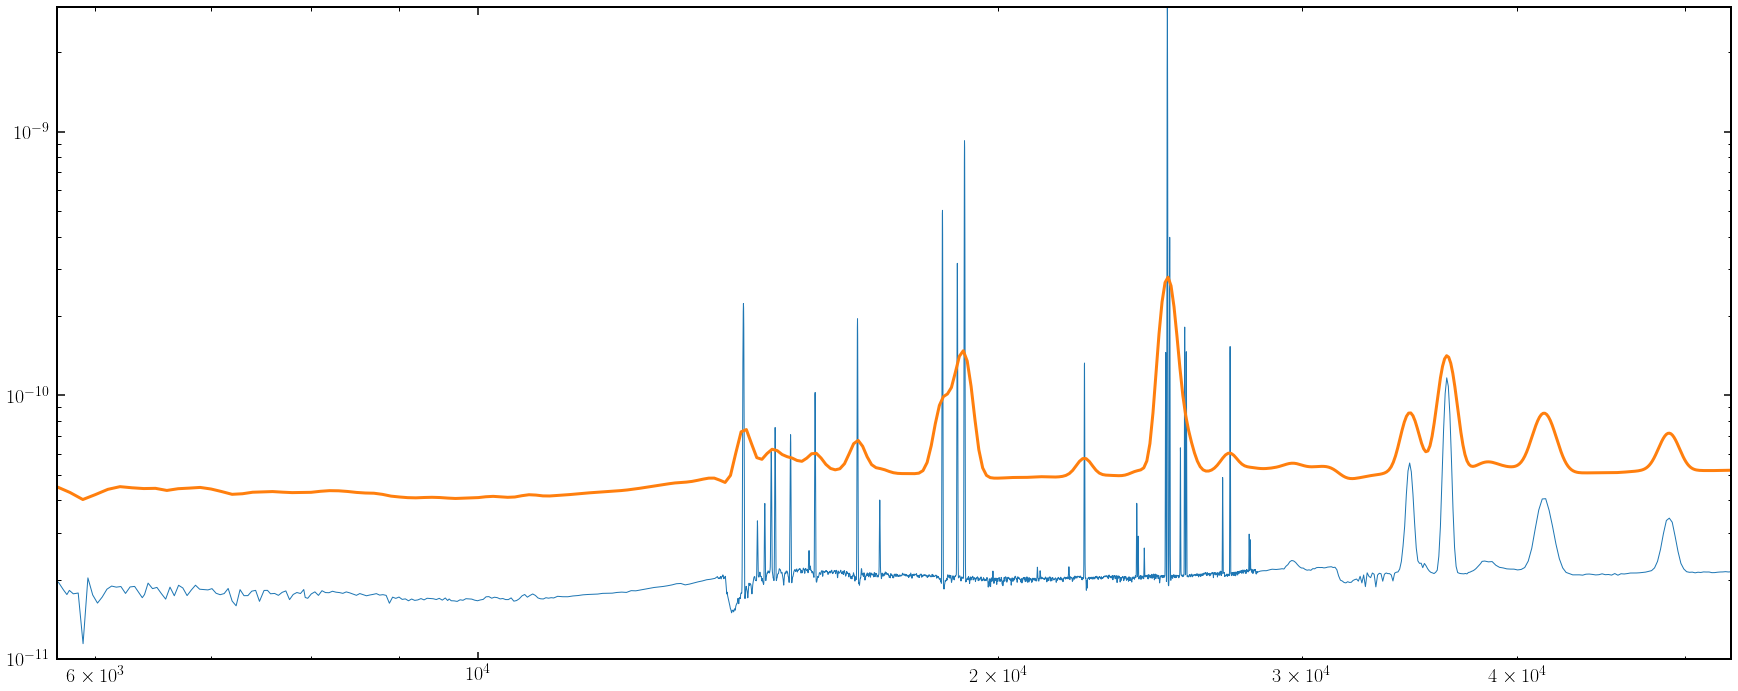

"import csv\n#with open('../data/etc_1241_FULLRANGE.txt', 'w') as f:\nwith open('../data/etc_basemodel_z2.8.txt', 'w') as f:\n\n    writer = csv.writer(f, delimiter='\t')\n    writer.writerows(zip(w3,f3))"

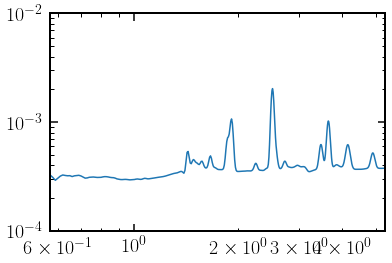

In [32]:
plt.figure(figsize=(30,12))
plt.plot(w1,f1,lw=1, label= 'raw model SED')
plt.plot(w2,f2*2.43,lw=3, label='10A SED')
plt.ylim(1e-11)
plt.loglog()
plt.show()

w3 = w2/1e4
f3 = f2*3631*1e3
#each ifu element: 1/20th of the arc
f3 *=2.43

plt.loglog(w3,f3*2)
plt.ylim(1e-4,0.01)

In [33]:
cond_truncate = (w2<5.3e4)&(w2>0.6e4)

w5,f5 = w2[cond_truncate],f2[cond_truncate]

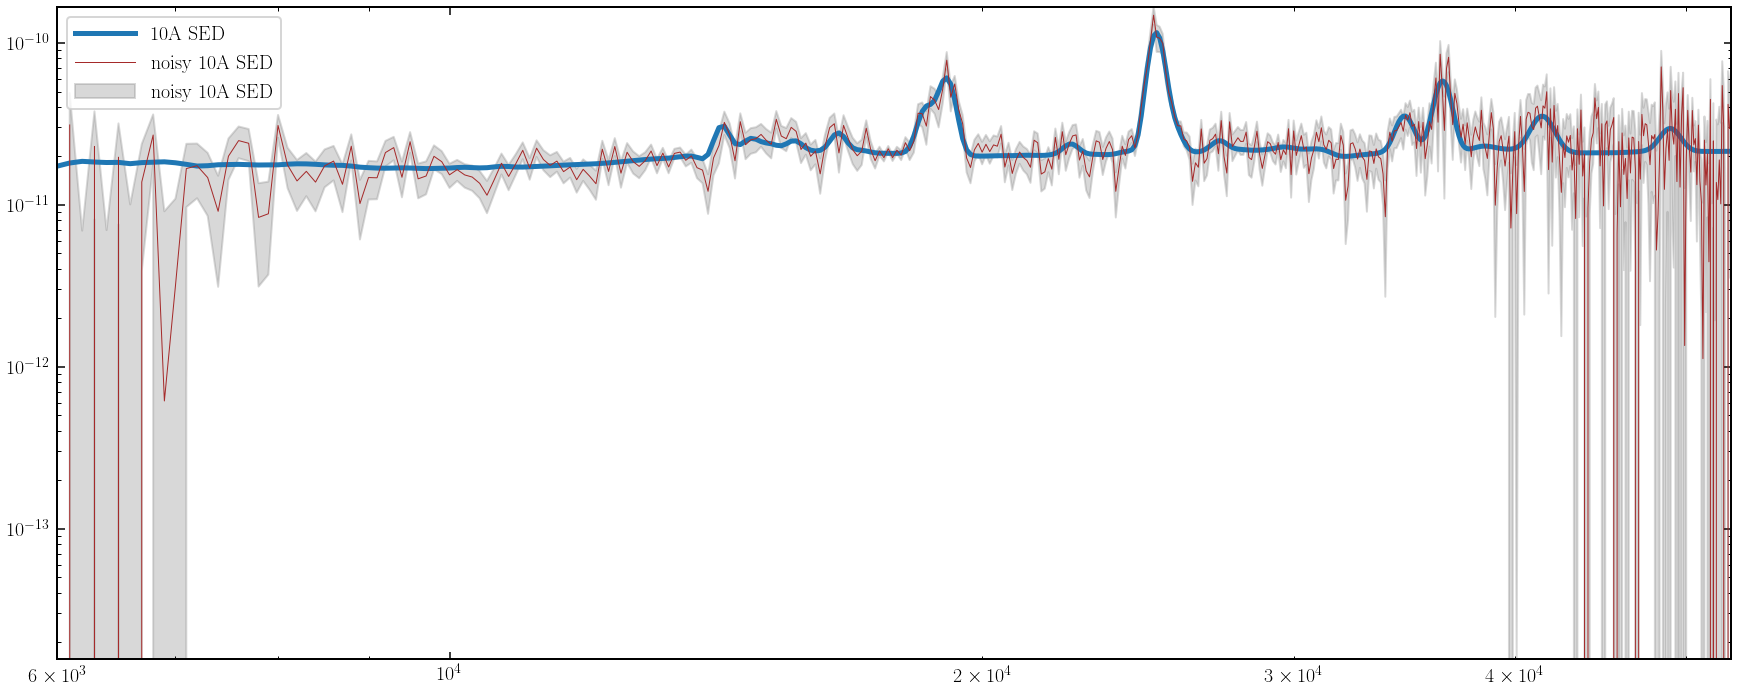

In [34]:
plt.figure(figsize=(30,12))
plt.plot(w2,f2,lw=5, label='10A SED')

f_per = []
e_per = []
#snr=50

for i, indiv5 in enumerate(w5):
    f_per.append(np.random.normal(f5[i],f5[i]/spline_final(indiv5)))
    e_per.append(f5[i]/spline_final(indiv5))
    
f_per = np.array(f_per)
e_per = np.array(e_per)

plt.plot(w5,f_per, label='noisy 10A SED',lw=1,color='brown')
plt.fill_between(w5,f_per-e_per,f_per+e_per, label='noisy 10A SED',alpha=0.3,color='grey')

plt.legend()
plt.loglog()
plt.xlim(0.6e4,5.3e4)
#plt.savefig('../plots/r1000_bin4_SED_snr_%i.png'%(snr))
plt.show()

In [10]:
#Use sedpy to get simulated photometry in specific filters (f2 should be in units of ergs/cm2/s)

"""from sedpy import observate
jwst1 = ['jwst_f{0}w'.format(b) for b in ['200','356']]
#jwst2 = ['jwst_f{0}w'.format(b) for b in ['1000','1130']]
#filterss = jwst1 + jwst2
filterss = jwst1
filterlist = observate.load_filters(filterss)
mags = observate.getSED(w2, f2, filterlist=filterlist)
mags"""

"from sedpy import observate\njwst1 = ['jwst_f{0}w'.format(b) for b in ['200','356']]\n#jwst2 = ['jwst_f{0}w'.format(b) for b in ['1000','1130']]\n#filterss = jwst1 + jwst2\nfilterss = jwst1\nfilterlist = observate.load_filters(filterss)\nmags = observate.getSED(w2, f2, filterlist=filterlist)\nmags"

In [40]:
mags_old = np.genfromtxt('../data/mags_ab_forecasts_z2.8_met_-0.5_dust2_0.25_NONPARA2.txt',
                         skip_header=1,dtype='str',delimiter=',')
mags_old = mags_old.astype(np.float)

#mags_old = -2.5*np.log10(mags_old)
print(mags_old)
#snr_mags = np.array([16.705,17.186,21.430,17.6738,23.5405,10.4897])
snr_mags=30

mags = []
mags_unc = []
for q, indiv in enumerate(mags_old):
    mags.append(np.random.normal(indiv,1/snr_mags))
    mags_unc.append(float(1/snr_mags))
mags = np.array(mags)
mags_unc = np.array(mags_unc)
print(mags)
print(mags_unc)

[27.24735644 26.86566583 26.91179809 26.88524122 26.59558934 26.56189436
 26.24416224 26.74085639 25.6199479  26.64147468 26.52714382 26.17947648
 26.45464151 26.69022615]
[27.24871615 26.80507873 26.90244467 26.90446451 26.62309142 26.59862258
 26.22315962 26.73560229 25.60508402 26.62607935 26.55773297 26.17702593
 26.44888226 26.70776943]
[0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333]
